In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Question 4

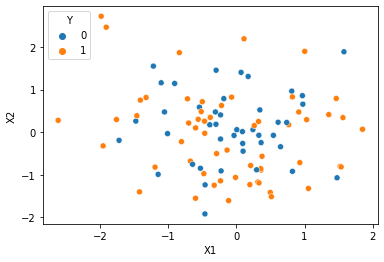

In [2]:
np.random.seed(42)

X1 = np.random.normal(0, 1, size = (100))
X2 = np.random.normal(0, 1, size = (100))
Y = np.random.choice([0,1], size = (100))

df = pd.DataFrame({"X1":X1,"X2":X2,"Y":Y})
sns.scatterplot(x='X1',y='X2',hue='Y',data=df)
plt.show()

In [3]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',degree=1)
svc.fit(df[["X1","X2"]],df["Y"])

SVC(degree=1, kernel='linear')

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predictions = svc.predict(df[["X1","X2"]])
print(pd.DataFrame(confusion_matrix(df["Y"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(df["Y"], predictions))

          Predicted 0  Predicted 1
Actual 0            0           43
Actual 1            0           57
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.57      1.00      0.73        57

    accuracy                           0.57       100
   macro avg       0.28      0.50      0.36       100
weighted avg       0.32      0.57      0.41       100



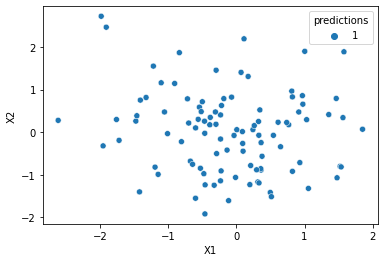

In [5]:
predictions = svc.predict(df[["X1","X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

In [6]:
svc = SVC(kernel='poly')
svc.fit(df[["X1","X2"]],df["Y"])

SVC(kernel='poly')

In [7]:
predictions = svc.predict(df[["X1","X2"]])
print(pd.DataFrame(confusion_matrix(df["Y"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(df["Y"], predictions))

          Predicted 0  Predicted 1
Actual 0            0           43
Actual 1            0           57
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.57      1.00      0.73        57

    accuracy                           0.57       100
   macro avg       0.28      0.50      0.36       100
weighted avg       0.32      0.57      0.41       100



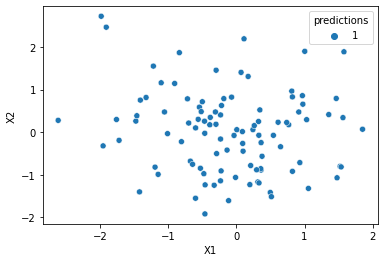

In [8]:
predictions = svc.predict(df[["X1","X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

In [9]:
svc = SVC(kernel='rbf')
svc.fit(df[["X1","X2"]],df["Y"])

SVC()

In [10]:
predictions = svc.predict(df[["X1","X2"]])
print(pd.DataFrame(confusion_matrix(df["Y"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(df["Y"], predictions))

          Predicted 0  Predicted 1
Actual 0           26           17
Actual 1           16           41
              precision    recall  f1-score   support

           0       0.62      0.60      0.61        43
           1       0.71      0.72      0.71        57

    accuracy                           0.67       100
   macro avg       0.66      0.66      0.66       100
weighted avg       0.67      0.67      0.67       100



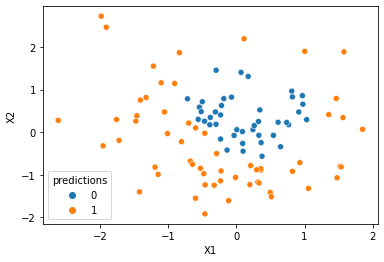

In [11]:
predictions = svc.predict(df[["X1","X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

### Question 5

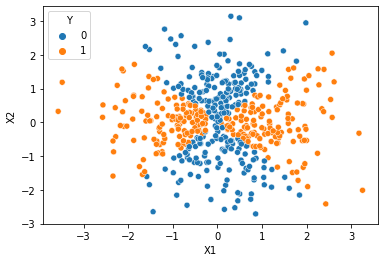

In [12]:
#5a 5b -> generating data an plotting it
X1 = np.random.normal(0, 1, size = (500))
X2 = np.random.normal(0, 1, size = (500))
Y = 1*(X1**2 - X2**2 > 0)

df = pd.DataFrame({"X1":X1,"X2":X2,"Y":Y})
sns.scatterplot(x='X1',y='X2',hue='Y',data=df)
plt.show()

In [13]:
#5c -> fitting a logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(df[["X1","X2"]],df["Y"])

LogisticRegression()

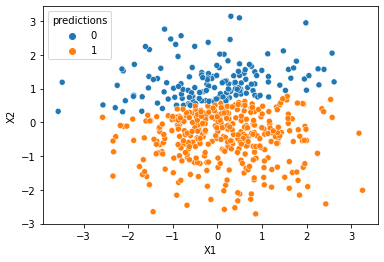

In [14]:
#5d -> plotting the linear decision boundary
predictions = lr.predict(df[["X1","X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

In [15]:
#5e -> fitting a logistic regression model using non linear predictors
df["X1squared"] = X1**2
df["X2squared"] = X2**2
df["X1X2"] = X1*X2

lr.fit(df[["X1","X2","X1squared","X2squared","X1X2"]],df["Y"])

LogisticRegression()

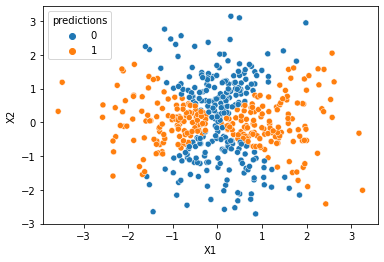

In [16]:
#5f -> plotting the decision boundary generated by the logistic regression model
predictions = lr.predict(df[["X1","X2","X1squared","X2squared","X1X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

In [17]:
#5g -> fitting a support vector classifier
svc = SVC(kernel='linear',degree=1)
svc.fit(df[["X1","X2"]],df["Y"])

SVC(degree=1, kernel='linear')

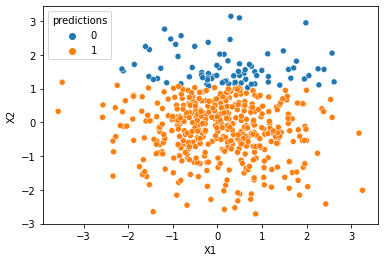

In [18]:
predictions = svc.predict(df[["X1","X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

In [19]:
#5h -> fitting a support vector machine
svc = SVC(kernel='rbf')
svc.fit(df[["X1","X2"]],df["Y"])

SVC()

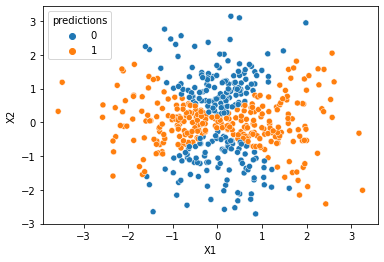

In [20]:
predictions = svc.predict(df[["X1","X2"]])
df["predictions"] = predictions
sns.scatterplot(x='X1',y='X2',hue='predictions',data=df)
plt.show()

### Question 6

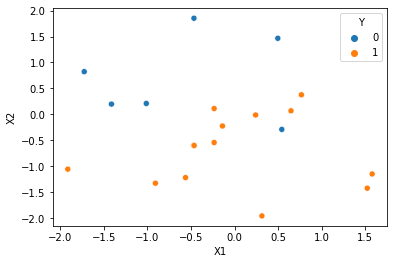

In [21]:
#6a -> generate data
np.random.seed(42)

X1 = np.random.normal(0, 1, size = (20))
X2 = np.random.normal(0, 1, size = (20))
Y = np.random.choice([0,1], size = (20))

df = pd.DataFrame({"X1":X1,"X2":X2,"Y":Y})
sns.scatterplot(x='X1',y='X2',hue='Y',data=df)
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01,0.1,0.9,1,10,10]}
svc = SVC()
clf = GridSearchCV(svc,param_grid=parameters,cv=5,return_train_score=True,scoring="f1")
clf.fit(df[["X1","X2"]],df["Y"])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.9, 1, 10, 10]},
             return_train_score=True, scoring='f1')

In [23]:
clf.best_estimator_

SVC(C=0.9)

In [24]:
print(clf.cv_results_["params"])
print(clf.cv_results_["mean_test_score"])

[{'C': 0.01}, {'C': 0.1}, {'C': 0.9}, {'C': 1}, {'C': 10}, {'C': 10}]
[0.81904762 0.81904762 0.93333333 0.93333333 0.89333333 0.89333333]


### Question 7

In [25]:
auto_path = "../../Data/Auto.csv"
auto = pd.read_csv(auto_path)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [26]:
auto["mileage"] = auto["mpg"] >= auto["mpg"].median()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,False
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,False
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,False
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,False
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,False


In [27]:
#fitting a support vector classifier
parameters = {'C':[0.1,1,10],"kernel":["linear","poly","rbf"],"degree":[1,2,3]}
svc = SVC(kernel="linear",degree=1)
clf = GridSearchCV(svc,param_grid=parameters,cv=5,return_train_score=True,scoring="f1")
clf.fit(auto[["cylinders","displacement","horsepower","weight"]],auto["mileage"])

GridSearchCV(cv=5, estimator=SVC(degree=1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='f1')

In [28]:
print(clf.cv_results_["params"])
print(clf.cv_results_["mean_test_score"])

[{'C': 0.1, 'degree': 1, 'kernel': 'linear'}, {'C': 0.1, 'degree': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 1, 'kernel': 'rbf'}, {'C': 0.1, 'degree': 2, 'kernel': 'linear'}, {'C': 0.1, 'degree': 2, 'kernel': 'poly'}, {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}, {'C': 0.1, 'degree': 3, 'kernel': 'linear'}, {'C': 0.1, 'degree': 3, 'kernel': 'poly'}, {'C': 0.1, 'degree': 3, 'kernel': 'rbf'}, {'C': 1, 'degree': 1, 'kernel': 'linear'}, {'C': 1, 'degree': 1, 'kernel': 'poly'}, {'C': 1, 'degree': 1, 'kernel': 'rbf'}, {'C': 1, 'degree': 2, 'kernel': 'linear'}, {'C': 1, 'degree': 2, 'kernel': 'poly'}, {'C': 1, 'degree': 2, 'kernel': 'rbf'}, {'C': 1, 'degree': 3, 'kernel': 'linear'}, {'C': 1, 'degree': 3, 'kernel': 'poly'}, {'C': 1, 'degree': 3, 'kernel': 'rbf'}, {'C': 10, 'degree': 1, 'kernel': 'linear'}, {'C': 10, 'degree': 1, 'kernel': 'poly'}, {'C': 10, 'degree': 1, 'kernel': 'rbf'}, {'C': 10, 'degree': 2, 'kernel': 'linear'}, {'C': 10, 'degree': 2, 'kernel': 'poly'}, {'C': 10, 'degree': 2, '

In [29]:
clf.best_estimator_

SVC(C=1, degree=1, kernel='linear')

### Question 8

In [30]:
oj_path = "../../Data/OJ.csv"
oj = pd.read_csv(oj_path)
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [31]:
oj["PurchaseX"] = oj["Purchase"] == "CH"

In [32]:
#8a -> creating a train and test set
from sklearn.model_selection import train_test_split

train,test = train_test_split(oj,test_size=0.2,random_state=42)

In [33]:
#8b -> fit a support vector classifier
svc = SVC(kernel="linear",degree=1,C=0.01)
svc.fit(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]],train["PurchaseX"])

SVC(C=0.01, degree=1, kernel='linear')

In [34]:
#8c -> train and test set errors
predictions = svc.predict(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(train["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(train["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            5          328
Actual 1            1          522
              precision    recall  f1-score   support

       False       0.83      0.02      0.03       333
        True       0.61      1.00      0.76       523

    accuracy                           0.62       856
   macro avg       0.72      0.51      0.39       856
weighted avg       0.70      0.62      0.48       856



In [35]:
predictions = svc.predict(test[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(test["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(test["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            1           83
Actual 1            0          130
              precision    recall  f1-score   support

       False       1.00      0.01      0.02        84
        True       0.61      1.00      0.76       130

    accuracy                           0.61       214
   macro avg       0.81      0.51      0.39       214
weighted avg       0.76      0.61      0.47       214



In [36]:
#8d -> find optimal cost
parameters = {'C':[0.01,0.1,1,10]}
svc = SVC(kernel="linear",degree=1)
clf = GridSearchCV(svc,param_grid=parameters,cv=5,return_train_score=True,scoring="f1")
clf.fit(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]],train["PurchaseX"])

GridSearchCV(cv=5, estimator=SVC(degree=1, kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True,
             scoring='f1')

In [37]:
clf.best_estimator_

SVC(C=10, degree=1, kernel='linear')

In [38]:
#8e -> train and test set errors using best model
predictions = clf.best_estimator_.predict(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(train["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(train["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0          258           75
Actual 1           67          456
              precision    recall  f1-score   support

       False       0.79      0.77      0.78       333
        True       0.86      0.87      0.87       523

    accuracy                           0.83       856
   macro avg       0.83      0.82      0.82       856
weighted avg       0.83      0.83      0.83       856



In [39]:
predictions = clf.best_estimator_.predict(test[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(test["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(test["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0           59           25
Actual 1           15          115
              precision    recall  f1-score   support

       False       0.80      0.70      0.75        84
        True       0.82      0.88      0.85       130

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.81      0.81       214



In [40]:
#8f -> SVM with radial kernel
svc = SVC()
svc.fit(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]],train["PurchaseX"])

SVC()

In [41]:
predictions = svc.predict(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(train["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(train["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0          333
Actual 1            0          523
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       333
        True       0.61      1.00      0.76       523

    accuracy                           0.61       856
   macro avg       0.31      0.50      0.38       856
weighted avg       0.37      0.61      0.46       856



In [42]:
predictions = svc.predict(test[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(test["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(test["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0           84
Actual 1            0          130
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.61      1.00      0.76       130

    accuracy                           0.61       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.37      0.61      0.46       214



In [43]:
parameters = {'C':[0.01,0.1,1,10]}
svc = SVC()
clf = GridSearchCV(svc,param_grid=parameters,cv=5,return_train_score=True,scoring="f1")
clf.fit(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]],train["PurchaseX"])

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='f1')

In [44]:
clf.best_estimator_

SVC(C=0.01)

In [45]:
predictions = clf.best_estimator_.predict(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(train["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(train["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0          333
Actual 1            0          523
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       333
        True       0.61      1.00      0.76       523

    accuracy                           0.61       856
   macro avg       0.31      0.50      0.38       856
weighted avg       0.37      0.61      0.46       856



In [46]:
predictions = clf.best_estimator_.predict(test[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(test["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(test["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0           84
Actual 1            0          130
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.61      1.00      0.76       130

    accuracy                           0.61       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.37      0.61      0.46       214



In [47]:
#8g -> SVM with polynomial kernel
svc = SVC(kernel="poly",degree=2)
svc.fit(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]],train["PurchaseX"])

SVC(degree=2, kernel='poly')

In [48]:
predictions = svc.predict(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(train["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(train["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0          333
Actual 1            0          523
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       333
        True       0.61      1.00      0.76       523

    accuracy                           0.61       856
   macro avg       0.31      0.50      0.38       856
weighted avg       0.37      0.61      0.46       856



In [49]:
predictions = svc.predict(test[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(test["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(test["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0           84
Actual 1            0          130
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.61      1.00      0.76       130

    accuracy                           0.61       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.37      0.61      0.46       214



In [50]:
parameters = {'C':[0.01,0.1,1,10]}
svc = SVC(kernel="poly",degree=2)
clf = GridSearchCV(svc,param_grid=parameters,cv=5,return_train_score=True,scoring="f1")
clf.fit(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]],train["PurchaseX"])

GridSearchCV(cv=5, estimator=SVC(degree=2, kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True,
             scoring='f1')

In [51]:
clf.best_estimator_

SVC(C=0.01, degree=2, kernel='poly')

In [52]:
predictions = clf.best_estimator_.predict(train[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(train["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(train["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0          333
Actual 1            0          523
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       333
        True       0.61      1.00      0.76       523

    accuracy                           0.61       856
   macro avg       0.31      0.50      0.38       856
weighted avg       0.37      0.61      0.46       856



In [53]:
predictions = clf.best_estimator_.predict(test[["WeekofPurchase","PriceCH","PriceMM","LoyalCH","SalePriceMM","SalePriceCH"]])
print(pd.DataFrame(confusion_matrix(test["PurchaseX"],predictions), ['Actual 0','Actual 1'], ['Predicted 0','Predicted 1']))
print(classification_report(test["PurchaseX"], predictions))

          Predicted 0  Predicted 1
Actual 0            0           84
Actual 1            0          130
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        84
        True       0.61      1.00      0.76       130

    accuracy                           0.61       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.37      0.61      0.46       214

